In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [5]:
df=pd.read_csv("Loan_Application.csv")

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Observation -  This df is our data frame and  loan status will be our label 

In [7]:
df.shape

(614, 13)

Observation -- df having 614 rows and 13 columns

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation-- we found that 
ApplicantIncome-----CoapplicantIncome---LoanAmount---Loan_Amount_Term	Credit_History   columns the difference between 75% and max is more so may be some outliers are present inside those columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:--------we have seen that obj type of data types present in the dataset

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Null value detection

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.isna().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

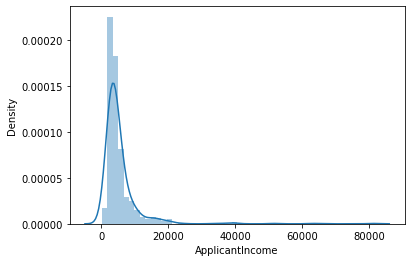

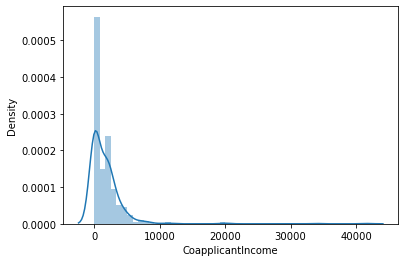

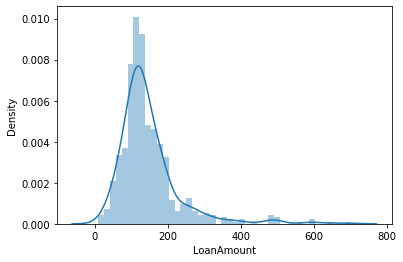

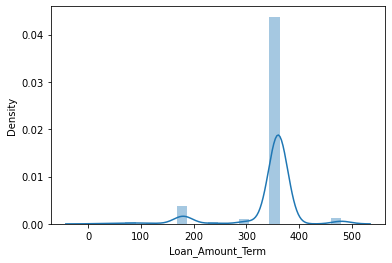

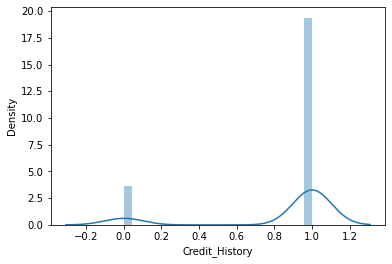

In [14]:
d=df.columns
for i in d:
    if df[i].dtypes!='object':
        sns.distplot(df[i])
        plt.show()

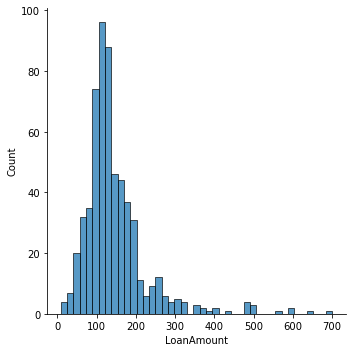

In [194]:
sns.displot(df['LoanAmount'])

Observation -Data is not normally distributed

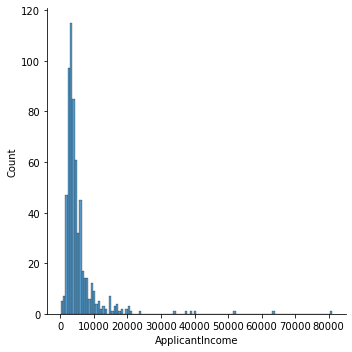

In [15]:
sns.displot(df['ApplicantIncome'])

Observation -Data is not normally distributed

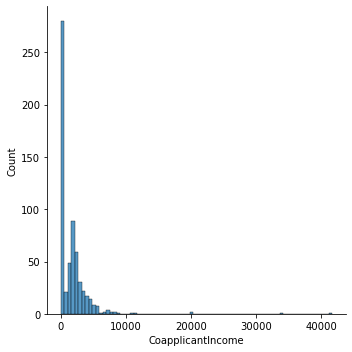

In [16]:
sns.displot(df['CoapplicantIncome'])

Observation -Data is not normally distributed

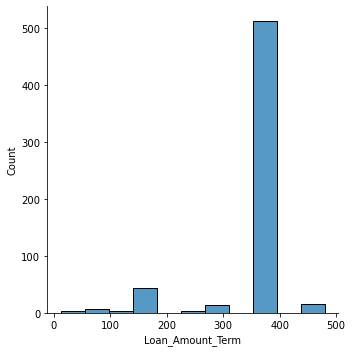

In [17]:
sns.displot(df['Loan_Amount_Term'])

Observation -Data is not normally distributed

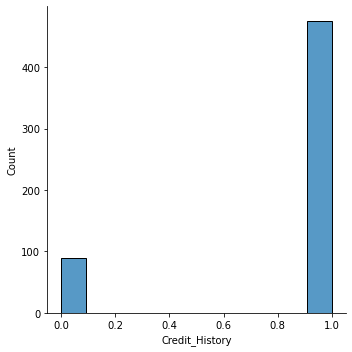

In [18]:
sns.displot(df['Credit_History'])

Observation -Data is not normally distributed

In [195]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

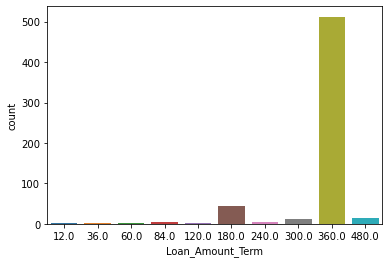

In [19]:
sns.countplot(df['Loan_Amount_Term'])

O---Data is distributed to vcarious output but 360 is having highest output

In [137]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

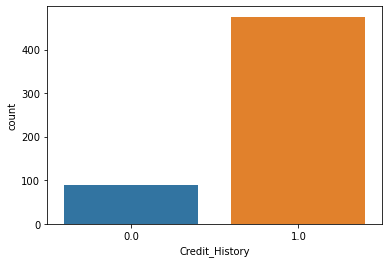

In [138]:
sns.countplot(df['Credit_History'])

0-->This columns highest output is 1 

<AxesSubplot:xlabel='Gender', ylabel='count'>

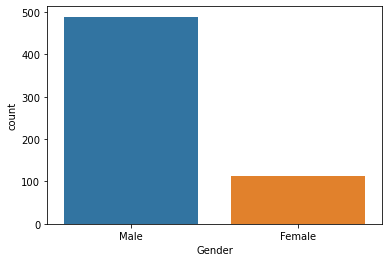

In [139]:
sns.countplot(df['Gender'])

Observation -- We found that this particular  column having two output Male and Female where we do found taht this column having calss embalnce problem 

<AxesSubplot:xlabel='Loan_ID', ylabel='count'>

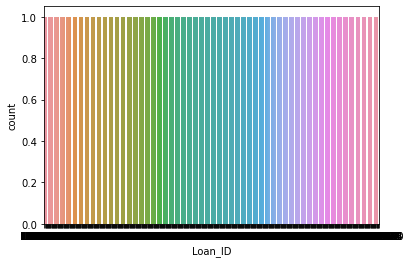

In [19]:
sns.countplot(df['Loan_ID'])

0-->this columns shows data distribution  among various output

In [20]:
df['Loan_ID'].value_counts()

LP002755    1
LP002004    1
LP001228    1
LP001610    1
LP002739    1
           ..
LP002931    1
LP002949    1
LP001749    1
LP001811    1
LP001634    1
Name: Loan_ID, Length: 614, dtype: int64

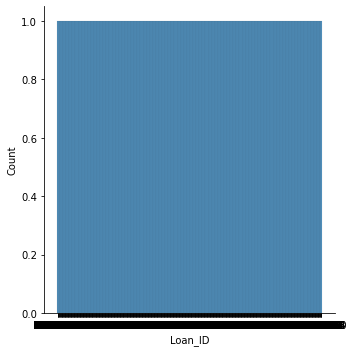

In [21]:
sns.displot(df['Loan_ID'])

Observation -- It is obj type column which we tried to plot and found that data is equally distributed

<AxesSubplot:xlabel='Married', ylabel='count'>

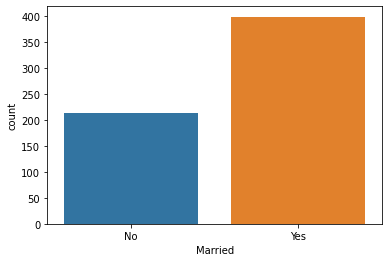

In [22]:
sns.countplot(df['Married'])

In [23]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:>

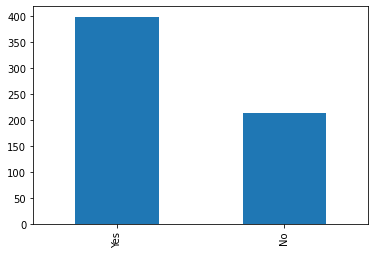

In [24]:
df['Married'].value_counts().plot(kind='bar')

0---> In this columns whichever outp[ut is yes that is related to get loan as yes

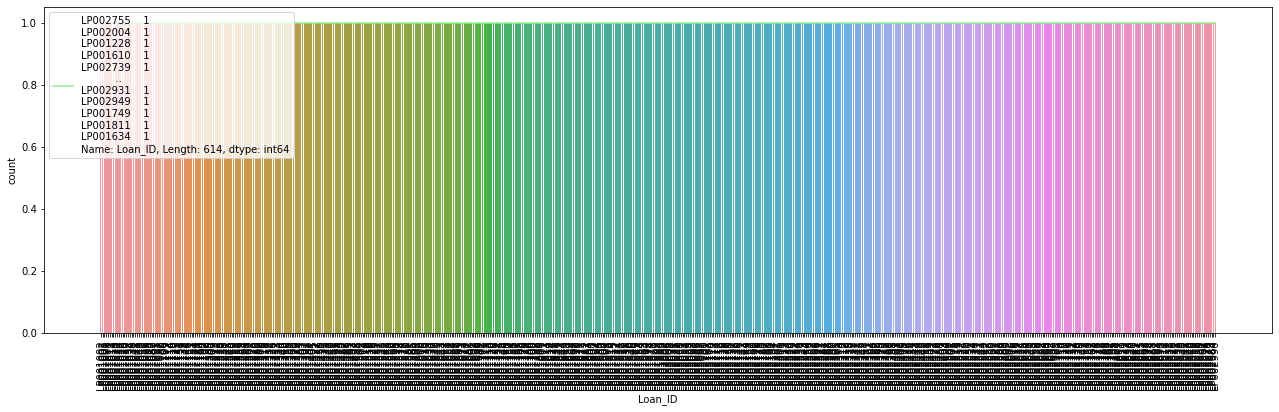


LP002755    1
LP002004    1
LP001228    1
LP001610    1
LP002739    1
           ..
LP002931    1
LP002949    1
LP001749    1
LP001811    1
LP001634    1
Name: Loan_ID, Length: 614, dtype: int64


In [25]:
d=df["Loan_ID"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Loan_ID',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

O-->we tried to plot data distyribution over loan id

<AxesSubplot:xlabel='Gender', ylabel='count'>

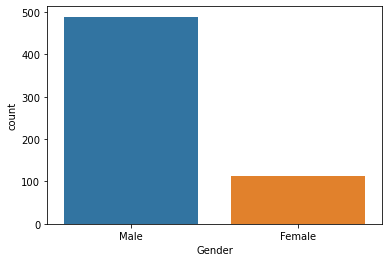

In [26]:
sns.countplot(df["Gender"])

In [27]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

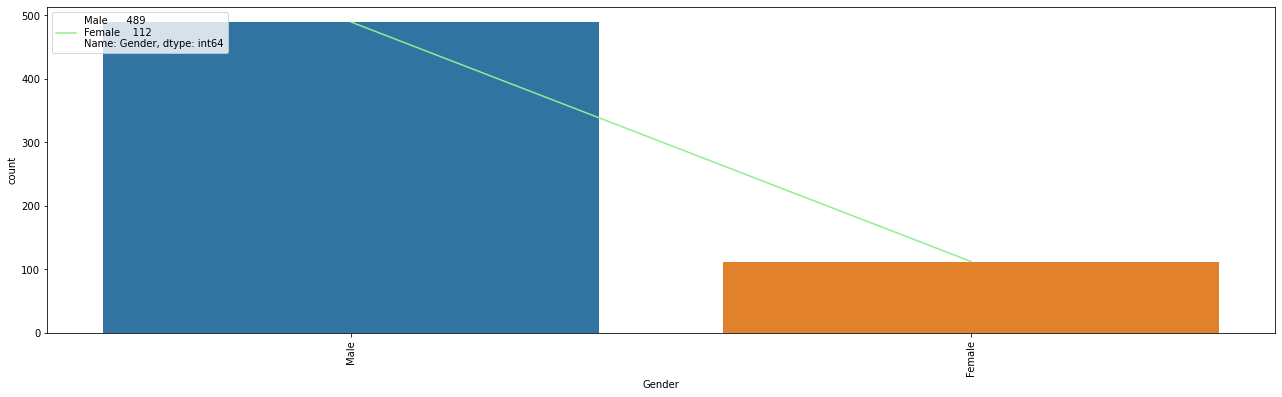


Male      489
Female    112
Name: Gender, dtype: int64


In [28]:
d=df["Gender"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Gender',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

0-->male is having highest probalility to get the loan

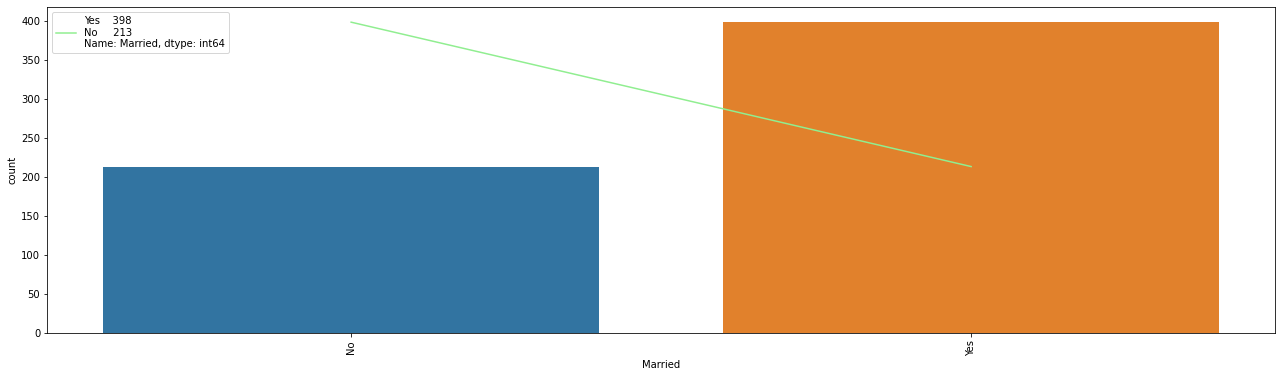


Yes    398
No     213
Name: Married, dtype: int64


In [29]:
d=df["Married"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Married',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

O-- Married are getting priority to get the loan as per plotted  o/p

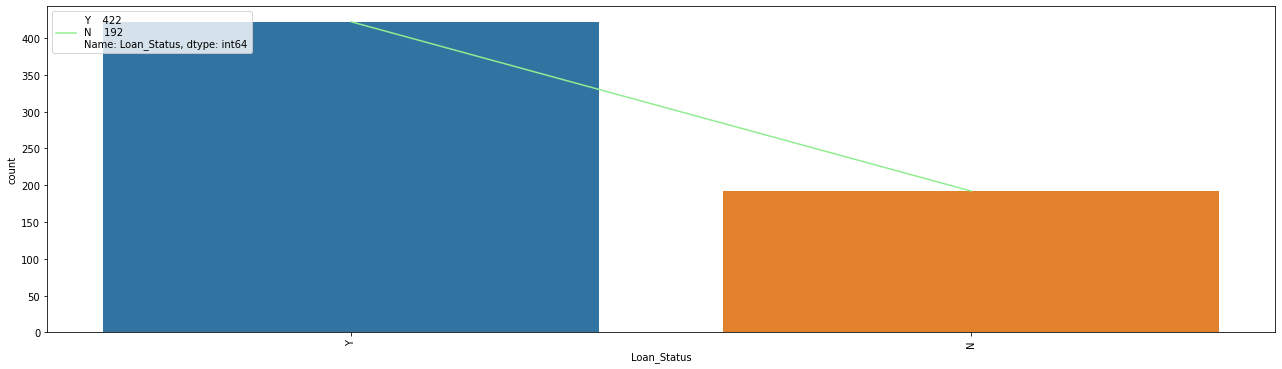


Y    422
N    192
Name: Loan_Status, dtype: int64


In [30]:
d=df["Loan_Status"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Loan_Status',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

O-- this is output of loan status which is label , it is having slide class imbalance issue

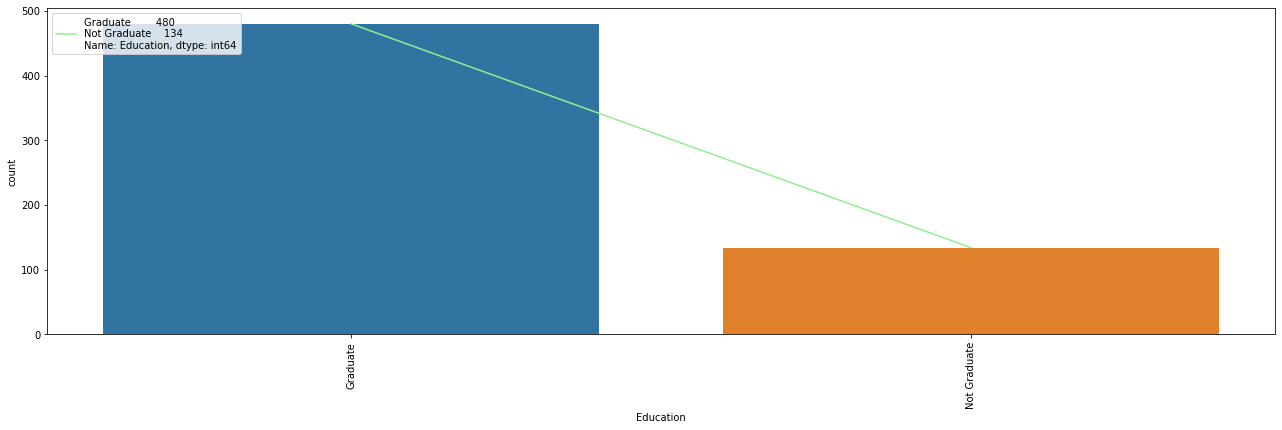


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [31]:
d=df["Education"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Education',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

0-- Graduate having highest probability to get the loan 

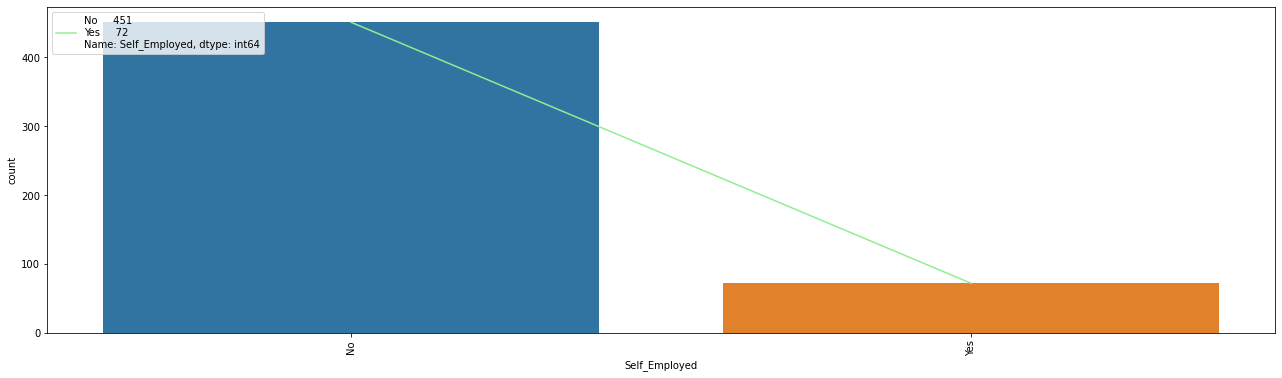


No     451
Yes     72
Name: Self_Employed, dtype: int64


In [24]:
d=df["Self_Employed"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Self_Employed',data=df)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

O-- who are not self employed  they are having highest probability to get the loan 

Null value replacing techniques

In [198]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

O-- now there is no null value

Checking obj types columns

In [203]:
d=df.columns
for i in d:
    if df[i].dtypes=="object":
        print(df[i].head(0))

Series([], Name: Loan_ID, dtype: object)
Series([], Name: Gender, dtype: object)
Series([], Name: Married, dtype: object)
Series([], Name: Dependents, dtype: object)
Series([], Name: Education, dtype: object)
Series([], Name: Self_Employed, dtype: object)
Series([], Name: Property_Area, dtype: object)
Series([], Name: Loan_Status, dtype: object)


Creating another dataframe which is similar to df

In [26]:
df1=df.copy()#creating a duplicate datset for ploting the skewness as numeric data
df1.shape

(523, 13)

In [27]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

From df1  dropping columns which are  categorial and output column too 

In [28]:
df1.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)#droping the objective columns

Again plotting just to check wherether all numerical value columns stored at df1

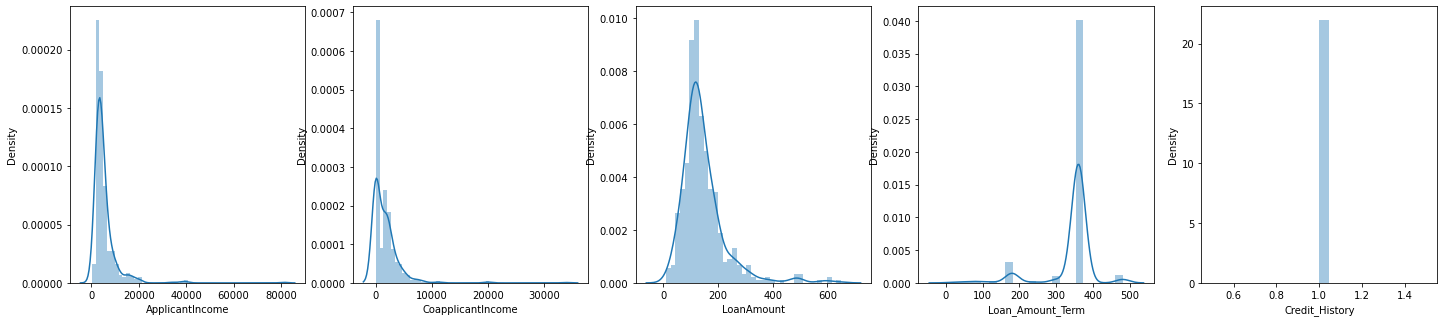

In [29]:
collist=df1.columns.values
ncol=12
nrows=10
plt.figure(figsize=(5*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


# Bi variate analysis

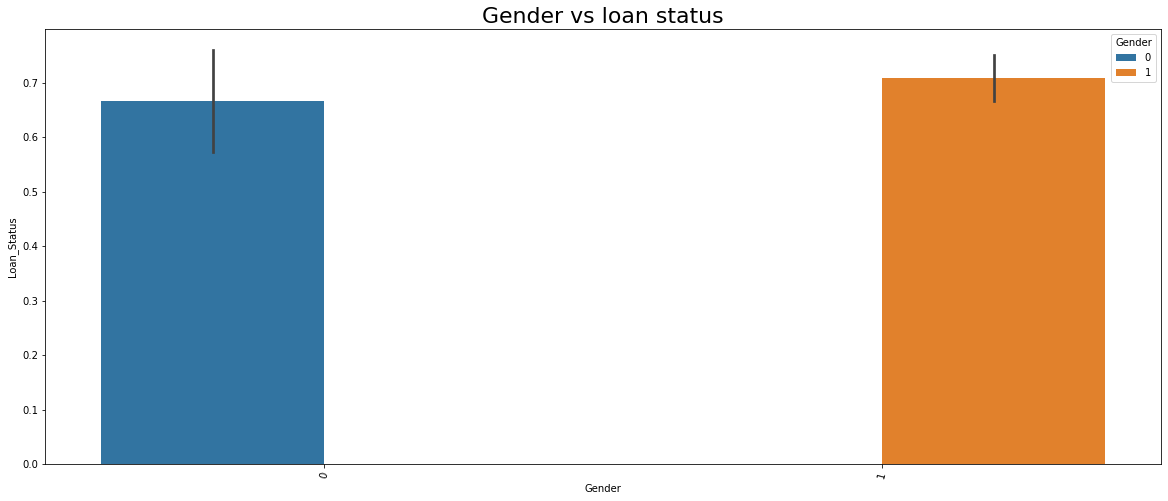

In [32]:
plt.figure(figsize=[20,8])
sns.barplot(x="Gender",y="Loan_Status",hue= "Gender",data=df)
plt.xlabel("Gender")
plt.ylabel("Loan_Status")
plt.title("Gender vs loan status",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

O-- plotted gender vs loan status  here gender columns output 1 category having highest probability to get loan 

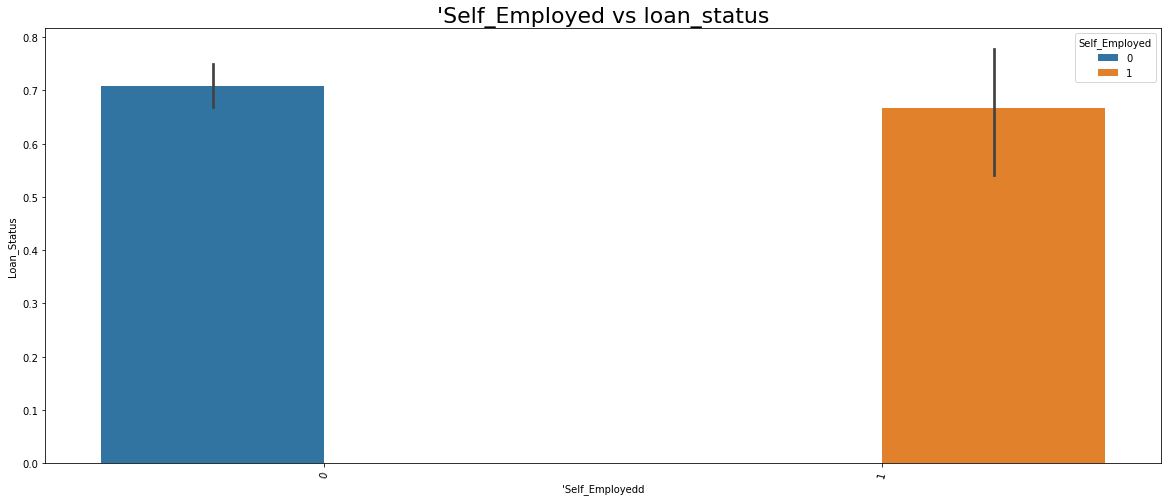

In [33]:
plt.figure(figsize=[20,8])
sns.barplot(x="Self_Employed",y="Loan_Status", hue="Self_Employed", data=df)
plt.xlabel("'Self_Employedd")
plt.ylabel("Loan_Status")
plt.title("'Self_Employed vs loan_status",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

O-- plotted self employed  vs loan status  hereself employed columns output o category having highest probability to get loan 

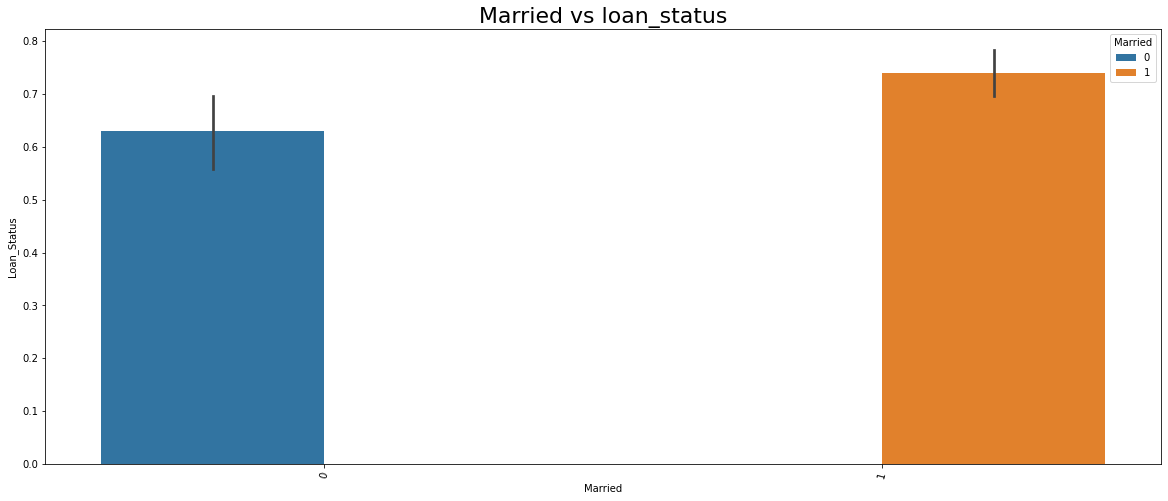

In [34]:
plt.figure(figsize=[20,8])
sns.barplot(x="Married",y="Loan_Status", hue="Married",data=df)
plt.xlabel("Married")
plt.ylabel("Loan_Status")
plt.title("Married vs loan_status",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

O->O-- plotted Married  vs loan status  here married  columns output 1 category having highest probability to get loan 

In [35]:
cor=df.corr()

In [36]:
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023424,0.007640,0.060888,0.036638,0.037933,0.035894,0.001182,0.040882,-0.014767,NaN,-0.182487,0.035571
Gender,-0.023424,1.000000,0.350681,0.218128,0.062914,-0.011238,0.043832,0.158797,0.111836,-0.093875,NaN,0.001284,0.036330
Married,0.007640,0.350681,1.000000,0.373178,0.010541,-0.012624,0.030374,0.110750,0.160488,-0.112045,NaN,0.026572,0.114309
Dependents,0.060888,0.218128,0.373178,1.000000,0.058805,0.053819,0.121762,-0.015662,0.142992,-0.096134,NaN,-0.002916,0.023213
Education,0.036638,0.062914,0.010541,0.058805,1.000000,-0.001953,-0.132307,-0.079528,-0.168406,-0.087290,NaN,-0.057328,-0.063471
Self_Employed,0.037933,-0.011238,-0.012624,0.053819,-0.001953,1.000000,0.169267,-0.017497,0.133958,-0.035395,NaN,-0.033122,-0.030614
ApplicantIncome,0.035894,0.043832,0.030374,0.121762,-0.132307,0.169267,1.000000,-0.101450,0.515906,-0.000025,NaN,-0.041089,-0.043445
CoapplicantIncome,0.001182,0.158797,0.110750,-0.015662,-0.079528,-0.017497,-0.101450,1.000000,0.192040,-0.008410,NaN,-0.000686,-0.046825
LoanAmount,0.040882,0.111836,0.160488,0.142992,-0.168406,0.133958,0.515906,0.192040,1.000000,0.076697,NaN,-0.077120,-0.061889
Loan_Amount_Term,-0.014767,-0.093875,-0.112045,-0.096134,-0.087290,-0.035395,-0.000025,-0.008410,0.076697,1.000000,NaN,-0.057330,-0.016902


Loan_ID                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Gender                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Self_Employed        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
LoanAmount              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Loan_Status                AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

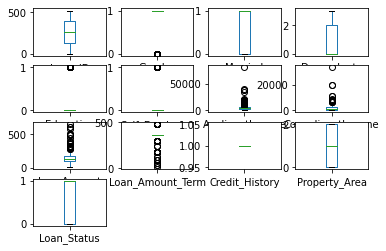

In [37]:
df.plot(kind='box' ,subplots=True  ,layout=(4,4))

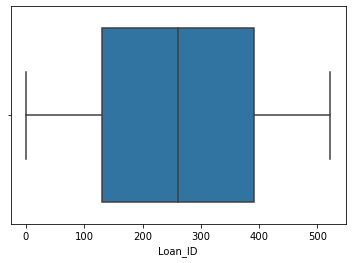

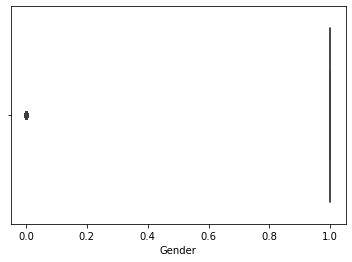

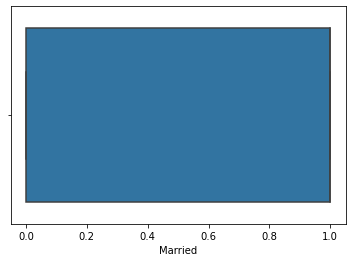

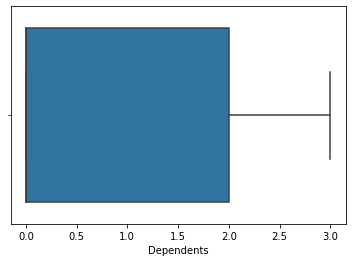

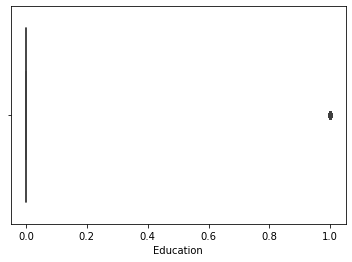

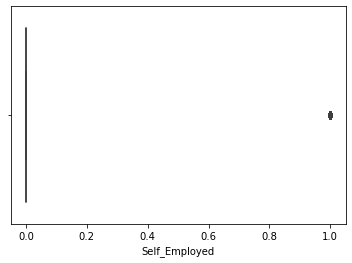

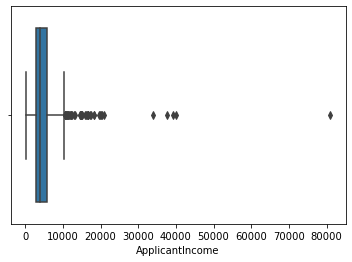

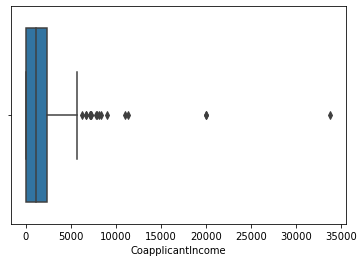

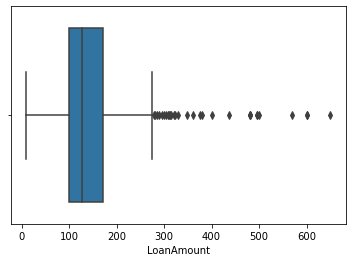

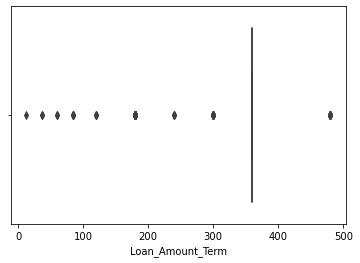

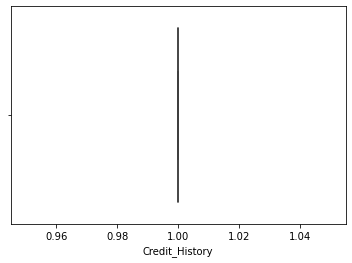

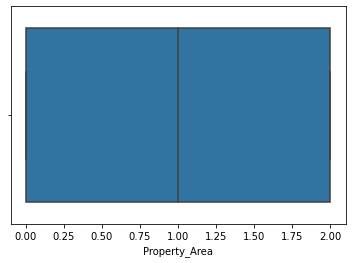

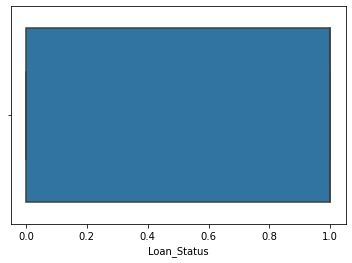

In [212]:
d=df.columns
for i in d:
    sns.boxplot(df[i])
    plt.show()

O-->ApplicantIncome      
CoapplicantIncome    
LoanAmount           
Loan_Amount_Term 
Self_Employed
Education having outlier 

In [213]:
cor=df.corr()

In [214]:
cor['Loan_Status'].sort_values(ascending= False)

Loan_Status          1.000000
Married              0.114309
Property_Area        0.051365
Gender               0.036330
Loan_ID              0.035571
Dependents           0.023213
Loan_Amount_Term    -0.016902
Self_Employed       -0.030614
ApplicantIncome     -0.043445
CoapplicantIncome   -0.046825
LoanAmount          -0.061889
Education           -0.063471
Credit_History            NaN
Name: Loan_Status, dtype: float64

1 st we will plot positive correlation 

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

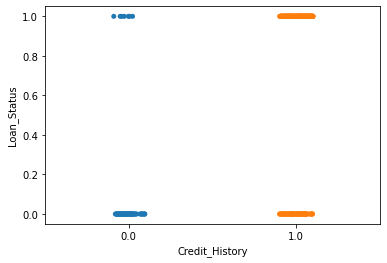

In [50]:
sns.stripplot(x='Credit_History', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

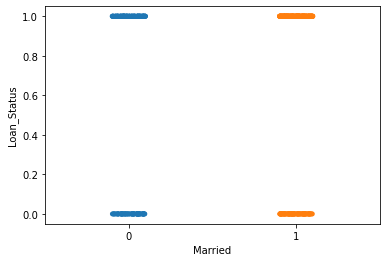

In [51]:
sns.stripplot(x='Married', y='Loan_Status', data=df)

Observation-- we plotted both the variable to see thre correlationship between two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

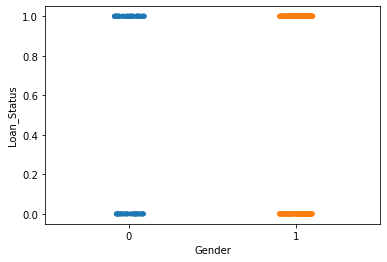

In [52]:
sns.stripplot(x='Gender', y='Loan_Status', data=df)

Observation-- weplotted both the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

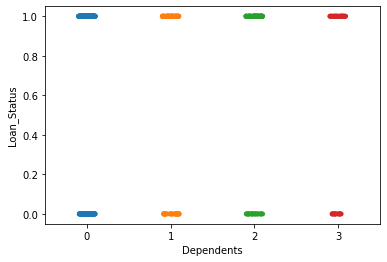

In [53]:
sns.stripplot(x='Dependents', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although positively correlated

Now we will plot -negative corelationship 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

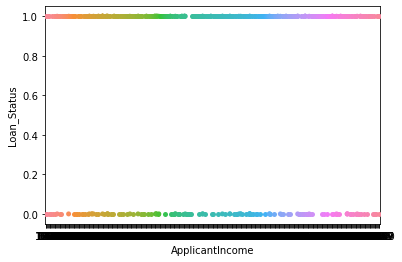

In [54]:
sns.stripplot(x='ApplicantIncome', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although negatively correlated

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

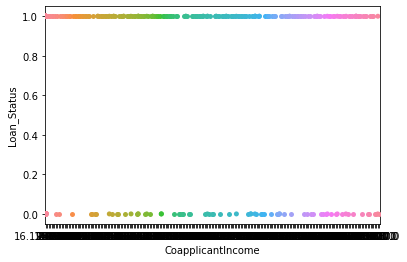

In [55]:
sns.stripplot(x='CoapplicantIncome', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although  negatively correlated

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

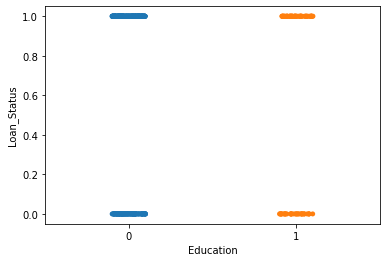

In [56]:
sns.stripplot(x='Education', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although  negatively correlated

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

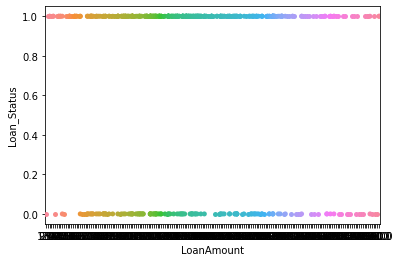

In [57]:
sns.stripplot(x='LoanAmount', y='Loan_Status', data=df)

Observation-- weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although  negatively correlated

In [215]:
dfcor=df.corr()

In [216]:
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023424,0.007640,0.060888,0.036638,0.037933,0.035894,0.001182,0.040882,-0.014767,NaN,-0.182487,0.035571
Gender,-0.023424,1.000000,0.350681,0.218128,0.062914,-0.011238,0.043832,0.158797,0.111836,-0.093875,NaN,0.001284,0.036330
Married,0.007640,0.350681,1.000000,0.373178,0.010541,-0.012624,0.030374,0.110750,0.160488,-0.112045,NaN,0.026572,0.114309
Dependents,0.060888,0.218128,0.373178,1.000000,0.058805,0.053819,0.121762,-0.015662,0.142992,-0.096134,NaN,-0.002916,0.023213
Education,0.036638,0.062914,0.010541,0.058805,1.000000,-0.001953,-0.132307,-0.079528,-0.168406,-0.087290,NaN,-0.057328,-0.063471
Self_Employed,0.037933,-0.011238,-0.012624,0.053819,-0.001953,1.000000,0.169267,-0.017497,0.133958,-0.035395,NaN,-0.033122,-0.030614
ApplicantIncome,0.035894,0.043832,0.030374,0.121762,-0.132307,0.169267,1.000000,-0.101450,0.515906,-0.000025,NaN,-0.041089,-0.043445
CoapplicantIncome,0.001182,0.158797,0.110750,-0.015662,-0.079528,-0.017497,-0.101450,1.000000,0.192040,-0.008410,NaN,-0.000686,-0.046825
LoanAmount,0.040882,0.111836,0.160488,0.142992,-0.168406,0.133958,0.515906,0.192040,1.000000,0.076697,NaN,-0.077120,-0.061889
Loan_Amount_Term,-0.014767,-0.093875,-0.112045,-0.096134,-0.087290,-0.035395,-0.000025,-0.008410,0.076697,1.000000,NaN,-0.057330,-0.016902


<AxesSubplot:>

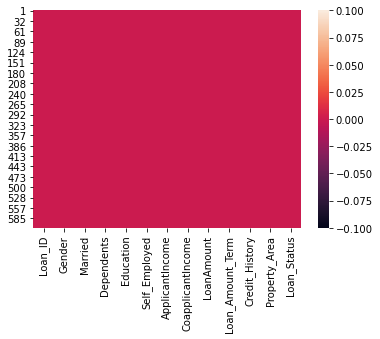

In [217]:
sns.heatmap(df.isnull())

In [218]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

<AxesSubplot:>

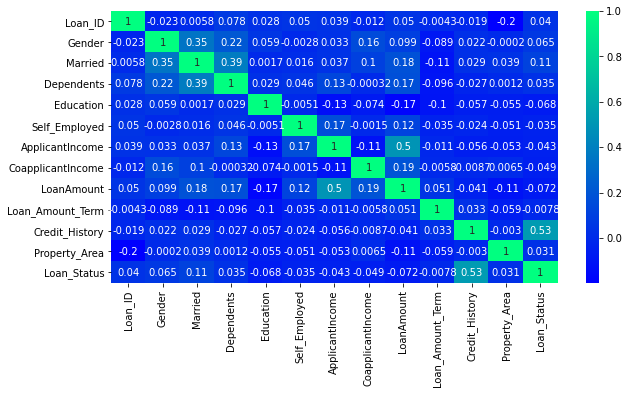

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="winter")

Observation -- whereever value is near to +1 one at that point respective columns are highly related and wherever  columns are having negative value near to -1 they are negatively correlated. although it is multiovariate plot

Multivariate analysis

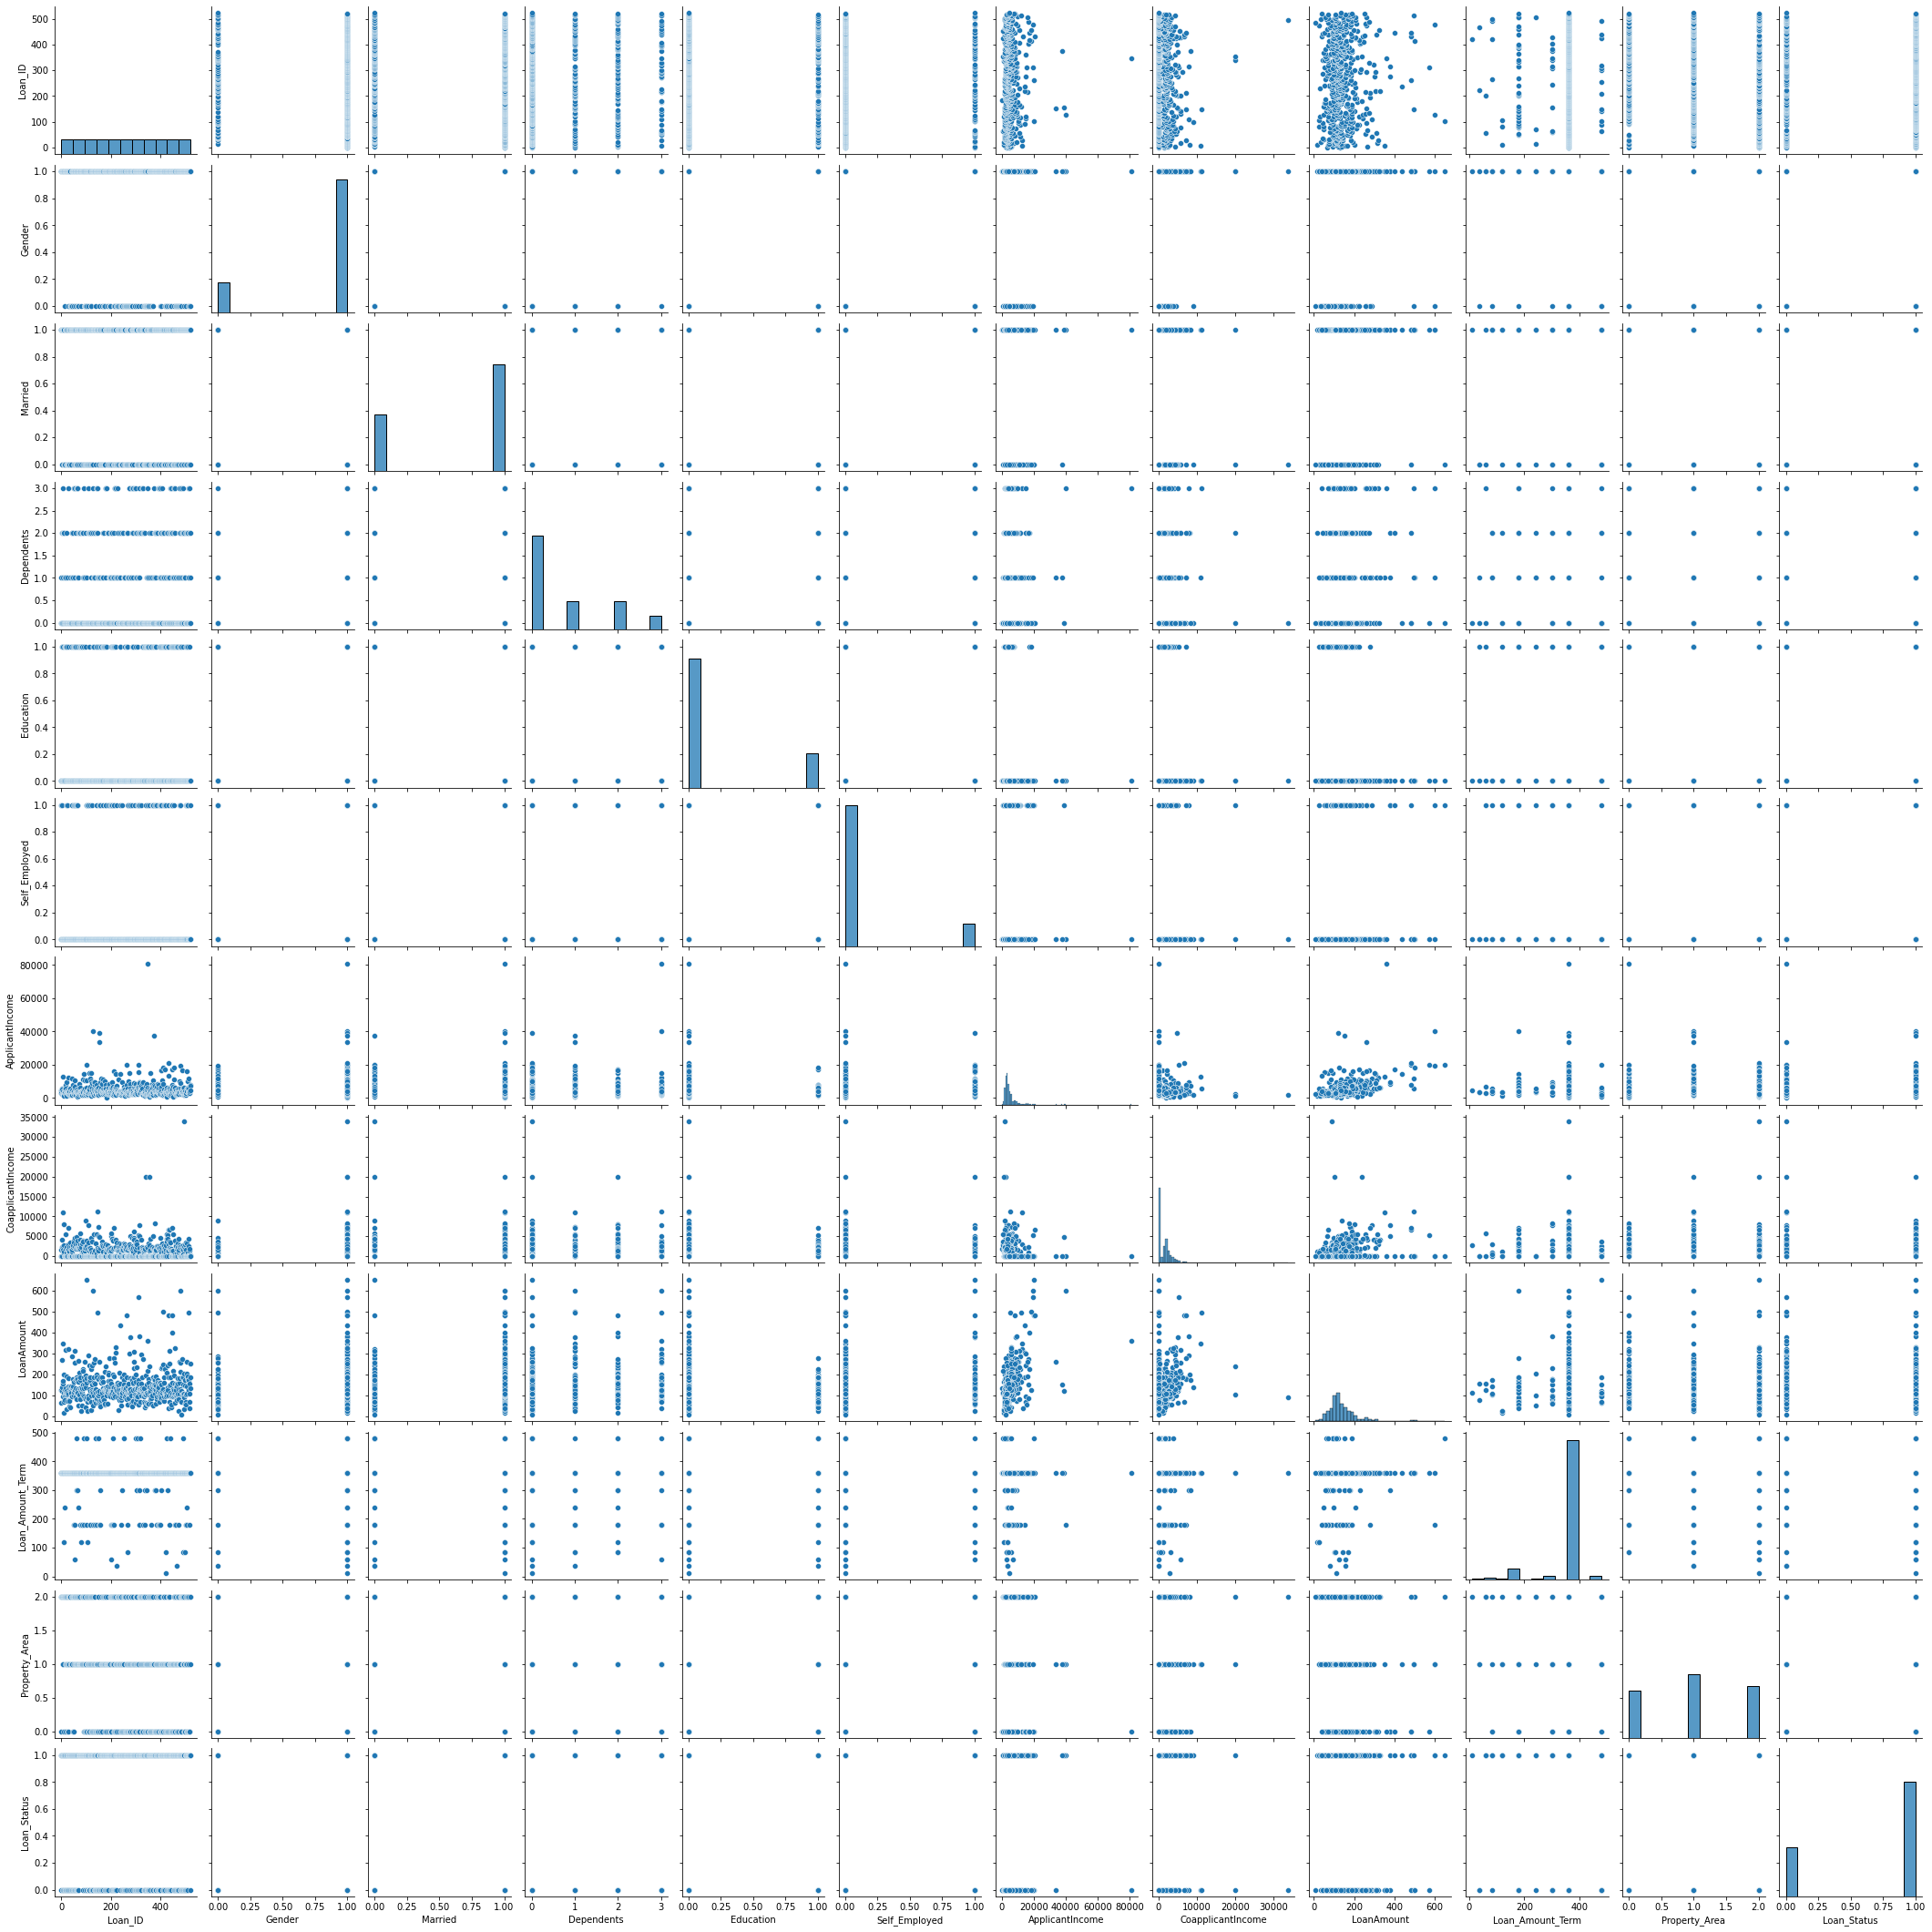

In [96]:
sns.pairplot(df)

we are dropping Credit Histroy as  as this containing NAN means all values of the column identical through df.corr() we found , it wount contribute much value to data set for predicting output

In [38]:
df1.drop(('Credit_History'), axis=1 , inplace= True)

In [39]:
df.drop(('Credit_History'), axis=1 , inplace= True)

In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
df1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

Skew and outlier removing

In [42]:
df1.skew()

ApplicantIncome      6.861998
CoapplicantIncome    5.696621
LoanAmount           2.510453
Loan_Amount_Term    -2.431222
dtype: float64

In [43]:
df1.shape

(523, 4)

In [44]:
Q1=df1.quantile(0.25)

Q3=df1.quantile(0.75)

IQR=Q3-Q1

IQR

ApplicantIncome      2939.5
CoapplicantIncome    2292.5
LoanAmount             71.0
Loan_Amount_Term        0.0
dtype: float64

In [48]:
dfnew=df1[~((df1 <  (Q1-1.5*IQR) )| (df1>(Q3+1.5*IQR)))]

In [49]:
dfnew.shape

(523, 4)

In [50]:
from scipy.stats import zscore

In [51]:
z=np.abs(zscore(df1))
dfnew=df1[(z<3).all(axis=1)]

In [52]:
dfnew.shape

(491, 4)

In [53]:
dataloss=((523-491)/523)*100
dataloss

6.118546845124283

Data loss6.11 is accepted

In [54]:
dfnew.skew()

ApplicantIncome      2.009565
CoapplicantIncome    1.400377
LoanAmount           1.083625
Loan_Amount_Term    -2.082862
dtype: float64

In [55]:
from sklearn.preprocessing import power_transform

In [56]:
dfnew['ApplicantIncome']=power_transform(np.array(dfnew['ApplicantIncome']).reshape(-1,1), method='box-cox')

In [57]:
dfnew['CoapplicantIncome']=power_transform(np.array(dfnew['CoapplicantIncome']).reshape(-1,1), method='yeo-johnson')

In [58]:
dfnew['LoanAmount']=power_transform(np.array(dfnew['LoanAmount']).reshape(-1,1), method='box-cox')

In [59]:
dfnew['Loan_Amount_Term']=power_transform(np.array(dfnew['Loan_Amount_Term']).reshape(-1,1), method='yeo-johnson')

In [60]:
dfnew['Loan_Amount_Term']=power_transform(np.array(dfnew['Loan_Amount_Term']).reshape(-1,1), method='yeo-johnson')

In [61]:
 dfnew.skew()

ApplicantIncome      0.004130
CoapplicantIncome   -0.184125
LoanAmount           0.041047
Loan_Amount_Term     0.392868
dtype: float64

O->skew came under range -0.5 to +0.5

In [62]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
dfnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

# Data preproceesing :

Appending other categorial and label column to clean dataframe dfnew

In [64]:
dfnew[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]=df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [65]:
dfnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,0.233403,0.746251,-0.007506,0.145275,0,1,1,1,0,0,0,0
2,-0.542490,-1.119073,-1.376843,0.145275,1,1,1,0,0,1,2,1
3,-0.815810,0.896163,-0.154632,0.145275,2,1,1,0,1,0,2,1
4,0.728262,-1.119073,0.219029,0.145275,3,1,0,0,0,0,2,1
5,0.540361,1.096930,1.912716,0.145275,4,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.604435,-1.119073,-1.240297,0.145275,518,0,0,0,0,0,0,1
610,0.031874,-1.119073,-2.228653,-2.633713,519,1,1,3,0,0,0,1
611,1.274560,0.180132,1.755496,0.145275,520,1,1,1,0,0,2,1
612,1.159351,-1.119073,0.923697,0.145275,521,1,1,2,0,0,2,1


In [66]:
y=dfnew['Loan_Status']

In [67]:
x=dfnew.drop(('Loan_Status'), axis=1)

In [68]:
dfnew.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
import  statistics as  st

from sklearn.model_selection import train_test_split
from  sklearn.linear_model   import LogisticRegression

Sclaing data set

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_std, y,test_size=.30 , random_state=17)

In [73]:
lg=LogisticRegression()

In [74]:
lg.fit(x_train,y_train)

lg.score(x_train,y_train)

0.7084548104956269

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import   MultinomialNB
from  sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from  sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import  RandomForestClassifier

from  sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [76]:
ad=AdaBoostClassifier( n_estimators=50)
ad.fit(x_train, y_train)
adprd=ad.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,adprd))
print(confusion_matrix(y_test, adprd))
print(classification_report(y_test,adprd))

Accuracy score is 0.6554054054054054
[[ 8 35]
 [16 89]]
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.72      0.85      0.78       105

    accuracy                           0.66       148
   macro avg       0.53      0.52      0.51       148
weighted avg       0.61      0.66      0.62       148



In [77]:
KernelList=['linear'  ,'poly'  ,'rbf']


for i in KernelList:
    sv=SVC(kernel =i)
    sv.fit(x_train,y_train)
    predsvc=sv.predict(x_test)
    print(sv.score(x_train,y_train))
    print("acccuracy score" , accuracy_score(y_test,predsvc))
    print("confusion matrix", confusion_matrix(y_test,predsvc))
    print("clasification report",classification_report(y_test,predsvc))

0.7055393586005831
acccuracy score 0.7094594594594594
confusion matrix [[  0  43]
 [  0 105]]
clasification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.71      1.00      0.83       105

    accuracy                           0.71       148
   macro avg       0.35      0.50      0.42       148
weighted avg       0.50      0.71      0.59       148

0.7900874635568513
acccuracy score 0.722972972972973
confusion matrix [[  6  37]
 [  4 101]]
clasification report               precision    recall  f1-score   support

           0       0.60      0.14      0.23        43
           1       0.73      0.96      0.83       105

    accuracy                           0.72       148
   macro avg       0.67      0.55      0.53       148
weighted avg       0.69      0.72      0.66       148

0.7405247813411079
acccuracy score 0.7297297297297297
confusion matrix [[  3  40]
 [  0 105]]
clasification report   

In [78]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("acccuracy score" , accuracy_score(y_test,preddtc))
print("confusion matrix", confusion_matrix(y_test,preddtc))
print("clasification report",classification_report(y_test,preddtc))  


acccuracy score 0.5743243243243243
confusion matrix [[11 32]
 [31 74]]
clasification report               precision    recall  f1-score   support

           0       0.26      0.26      0.26        43
           1       0.70      0.70      0.70       105

    accuracy                           0.57       148
   macro avg       0.48      0.48      0.48       148
weighted avg       0.57      0.57      0.57       148



In [79]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train, y_train)
kmnpred=kmn.predict(x_test)
print("accuracy score is",accuracy_score(y_test,kmnpred))
print("confusion matrix", confusion_matrix(y_test,kmnpred))
print("classification report",classification_report(y_test,kmnpred))

accuracy score is 0.7162162162162162
confusion matrix [[ 8 35]
 [ 7 98]]
classification report               precision    recall  f1-score   support

           0       0.53      0.19      0.28        43
           1       0.74      0.93      0.82       105

    accuracy                           0.72       148
   macro avg       0.64      0.56      0.55       148
weighted avg       0.68      0.72      0.66       148



In [80]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("accuracy score is",accuracy_score(y_test,predrfc))
print("confusion matrix", confusion_matrix(y_test,predrfc))
print("classification report",classification_report(y_test,predrfc))

accuracy score is 0.6621621621621622
confusion matrix [[ 6 37]
 [13 92]]
classification report               precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.71      0.88      0.79       105

    accuracy                           0.66       148
   macro avg       0.51      0.51      0.49       148
weighted avg       0.60      0.66      0.61       148



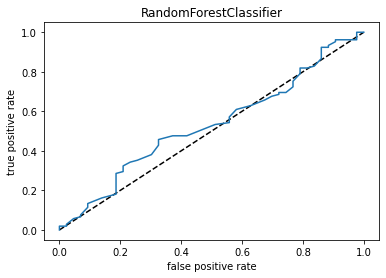

0.5078626799557032


In [81]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

y_pred_proba= rfc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='rfr')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()





auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

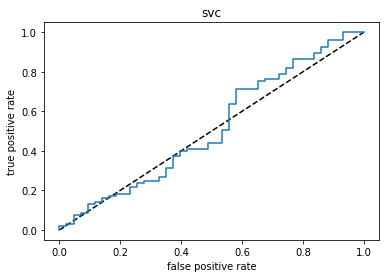

0.5078626799557032


In [82]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

sv=SVC(probability=True)
sv.fit(x_train,y_train)

y_pred_proba= sv.predict_proba(x_test)[:,1]



fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='sv')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('svc')
plt.show()





auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

Cross  value detection for predicting best model

In [83]:
from sklearn.model_selection  import cross_val_score

In [84]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.706720263863121


In [85]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.6238095238095238


In [86]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.5928468357039786


In [87]:
print(cross_val_score(kmn,x,y,cv=5).mean())

0.5014430014430015


In [88]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.5932591218305504


Hyper tuning the parameter  for  best model svc 

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameter= {'kernel':['linear', 'rbf', 'mae', 'sigmoid'],
           'gamma':['scale', 'auto']}

In [91]:
GCV=GridSearchCV(sv,parameter,cv=5)

In [92]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'mae', 'sigmoid']})

In [93]:
GCV.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [94]:
Finalmode=SVC(gamma= 'scale', kernel= 'linear')
Finalmode.fit(x_train, y_train)
acc=accuracy_score(y_test,predsvc)
print(acc*100)




72.97297297297297


In [95]:
import joblib
joblib.dump(Finalmode,"Bestmodel for Loan_Application_prediction.pkl")

['Bestmodel for Loan_Application_prediction.pkl']